## Fabrica de juguetes

### Abstract

El dataset elegido tiene la información de transacciones de un fabricante de juguetes que comercializa y envía a varios paises del mundo. El mismo contiene 2823 filas y 25 columnas. 
Las columnas que se destacan por tener datos potencialmente útiles, los cuales se les aplicarán transformaciones y adecuaciones para lograr la obtención de información son las que se definen:

_QUANTITYORDERED_: cantidad ordenada en cada transacción de venta

_PRICEEACH_:       precio unitario

_SALES_:           subtotal de venta de cada línea de orden de venta

_ORDERDATE_:       fecha de transacción

_STATUS_:          informa acerca del estado de cada línea

*QTR_ID*_*:          número de trimestre

*MONTH_ID*:        número de mes

*YEAR_ID*:         año

_PRODUCTLINE_:     la línea de producto es un conjunto de juguetes que tiene una clasifiación común, por ejemplo: "Autos"

_MSRP_:            la sigla signifia Manufacter suggested retail price. Es el precio de venta que el fabricante le sugiere al distribuidor 

_PRODUCTCODE_:     es el código de identificación de cada producto

_CUSTOMERNAME_:    es el nombre del cliente

_CITY_:            ciudad de ubicación del cliente

_STATE_:           Estado de ubicación del cliente

_COUNTRY_:         país de ubicación del cliente

_DEALSIZE_:        tamaño del negocio

### Preguntas
En el desarrollo de este trabajo de exploración y análisis, intentaremos respondernos a las siguientes preguntas:

- ¿Podemos obtener datos estadísticos de esta actividad comercial?
- ¿Existirá una forma habitual de consumo?
- ¿Cómo se distribuyen las unidades vendidas en el mundo?
- ¿Cuáles son los juguetes más elegidos por nuestros consumidores?
- ¿Tenemos un _pricing_ adecuado?
- ¿Estamos sugiriendo bien el precio de venta minorista?

### Hipótesis
Se desea saber si hay estacionalidad de consumo y si los precios acompañan a las variaciones en la demanda. Es esperable que se venda más caro cuando hay más demanda y viceversa.
A priori podemos imaginar que  en el mundo hay fechas especiales en los que se compran más juguetes. Particularmente en occidente, la Navidad. Deberíamos registrar un pico de demanda en los meses previos (octubre - diciembre). Habrá que ver si ocurre lo mismo en los clientes de oriente.
El problema al que se apunta es a tener mayor visibilidad de la dinámica comercial conociendo la estacionlidad y averiguando si existen patrones de consumo.
Esto nos permitirá tener los productos fabricados en el momento que se los necesita para la venta, con los precios de venta ajustados convenientemente. De esta manera, procurar un ajuste óptimo entre stocks y precio de venta que permita maximizar los ingresos a futuro.
Otro tema de estudio será averiguar si existe correlación entre, el precio de venta y el MSRP. Es perable que esté relacionado, de otra manera se estaría inyectando confusión a las jugueterías y/o a los consumidores. 

In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from bokeh.io import show, output_file
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.models import DatetimeTickFormatter
from bokeh.palettes import Spectral6
from bokeh.models import HoverTool
from bokeh.io import show, output_notebook
from bokeh.embed import file_html
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file
from bokeh.plotting import curdoc, figure, show

Loading BokehJS ...

In [77]:
url="https://raw.githubusercontent.com/martinsasia/Data-Science/cbe1d50b93e34ab139daea92a15a5a4c5d3ea353/sales_data_sample.csv?token=GHSAT0AAAAAACOLDFOYLC4EHIPCCUDK56SQZOT3PMA"
df=pd.read_csv(url,encoding = 'latin 1')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [79]:
df.describe(include = 'all')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.00000,...,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,252,6,NaN,NaN,NaN,...,92,9,73,16,73,19,3,77,72,3
top,NaN,NaN,NaN,NaN,NaN,11/14/2003 0:00,Shipped,NaN,NaN,NaN,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,2617,NaN,NaN,NaN,...,259,55,304,416,259,1004,1407,259,259,1384
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,NaN,NaN,2.717676,7.092455,2003.81509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,NaN,1.203878,3.656633,0.69967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,NaN,1.000000,1.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,NaN,NaN,2.000000,4.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,NaN,NaN,3.000000,8.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,NaN,NaN,4.000000,11.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.nunique()

ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2           9
CITY                  73
STATE                 16
POSTALCODE            73
COUNTRY               19
TERRITORY              3
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

In [81]:
df.corr

<bound method DataFrame.corr of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \


In [82]:
#La columna ADDRESSLINE1 no tiene datos sirvan para obtener informaciones relevantes, al igual que ADDRESSLINE2 que esta mayormente vacía. 
#Se aplica el mismo criterio para ORDERLINENUMBER, PHONE, POSTALCODE, CONTACTFIRSTNAME Y CONTACTLASTNAME. 

df = df.drop(['ORDERNUMBER', 'ORDERLINENUMBER', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME'], axis= 'columns')

In [83]:
df.isna()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,TERRITORY,DEALSIZE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2819,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2820,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2821,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [84]:
df[['COUNTRY','STATE','TERRITORY']].tail(40)

,COUNTRY,STATE,TERRITORY
2783,USA,MA,NaN
2784,Canada,BC,NaN
2785,Germany,NaN,EMEA
2786,USA,PA,NaN
2787,UK,Isle of Wight,EMEA
2788,USA,NY,NaN
2789,Japan,Tokyo,Japan
2790,USA,MA,NaN
2791,Australia,NSW,APAC
2792,Finland,NaN,EMEA


In [85]:
#Los territorios son muy abarcativos, sólo 3 datos únicos, EMEA, APAC y Japón. Japón es muy pequeño en comparación, se podría integrar a APAC. No tiene sentido dividir el mundo de esa manera.
#Se eliminará la columna TERRITORY también.

df = df.drop(['TERRITORY'], axis= 'columns')

In [86]:
print(df.isnull().sum())

QUANTITYORDERED       0
PRICEEACH             0
SALES                 0
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
CITY                  0
STATE              1486
COUNTRY               0
DEALSIZE              0
dtype: int64


In [87]:
#Busco los valores de STATE nulos y le asigno el valor de la columna COUNTRY
df['STATE'].fillna(df['COUNTRY'], inplace=True)


C:\Users\Martin Sasia\AppData\Local\Temp\ipykernel_14012\3258497067.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATE'].fillna(df['COUNTRY'], inplace=True)


In [88]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CUSTOMERNAME       0
CITY               0
STATE              0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [89]:
#Se quiere saber si la columna PRICEEACH es equivalente a la dividir SALES en QUANTITYOREDERED. 
#Para esto, se crea una columna calculada que será el subtotal de ventas dividido la cantidad vendida y la llamaremos REALPRICEEACH
df['REALPRICEEACH'] = df['SALES']/df['QUANTITYORDERED']

In [90]:
#Creo una columna DAY_ID
df['DAY_ID']=df['ORDERDATE'].str.split("/").str.get(1).astype(int)

In [91]:
#Creo un dataframe con los datos de fecha
year = df['YEAR_ID'].astype(int)
month = df['MONTH_ID'].astype(int)
day = df['DAY_ID'].astype(int)
date = pd.DataFrame(data={'year':year,'month':month, 'day':day})
print(date,type(date))

      year  month  day
0     2003      2   24
1     2003      5    7
2     2003      7    1
3     2003      8   25
4     2003     10   10
...    ...    ...  ...
2818  2004     12    2
2819  2005      1   31
2820  2005      3    1
2821  2005      3   28
2822  2005      5    6

[2823 rows x 3 columns] <class 'pandas.core.frame.DataFrame'>


In [92]:
#Reemplazo ORDERDATE con el dato con formato fecha
df['ORDERDATE']= pd.to_datetime(date)
df['ORDERDATE']
df.sort_values(by='ORDERDATE', inplace=True)


In [93]:
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,DEALSIZE,REALPRICEEACH,DAY_ID
578,30,100.00,5151.00,2003-01-06,Shipped,1,1,2003,Vintage Cars,170,S18_1749,Online Diecast Creations Co.,Nashua,NH,USA,Medium,171.70,6
680,50,67.80,3390.00,2003-01-06,Shipped,1,1,2003,Vintage Cars,60,S18_2248,Online Diecast Creations Co.,Nashua,NH,USA,Medium,67.80,6
1267,22,86.51,1903.22,2003-01-06,Shipped,1,1,2003,Vintage Cars,92,S18_4409,Online Diecast Creations Co.,Nashua,NH,USA,Small,86.51,6
2024,49,34.47,1689.03,2003-01-06,Shipped,1,1,2003,Vintage Cars,41,S24_3969,Online Diecast Creations Co.,Nashua,NH,USA,Small,34.47,6
1539,45,31.20,1404.00,2003-01-09,Shipped,1,1,2003,Vintage Cars,33,S24_1937,"Blauer See Auto, Co.",Frankfurt,Germany,Germany,Small,31.20,9


En este estudio únicamente se tendrá en cuenta los datos de transacciones cerradas, no canceladas ni en disputa.

In [94]:
#Antes de empezar a trabajar con el dataframe, filtraremos dejando a fuera del análisis, para nuestro caso a las transacciones que no se concretaron. 
#Estas son las que tienen STATUS: 'Disputed' y 'Cancelled'.
df['STATUS'].unique()

array(['Shipped', 'Resolved', 'Cancelled', 'On Hold', 'Disputed',
       'In Process'], dtype=object)

In [95]:
#Aplico el filtro y en lo consecutivo trabajaré con df_vendido
df_vendido = df.loc[df['STATUS'].isin(['Shipped', 'In Process', 'On Hold',
       'Resolved'])]
df= None
df_vendido.head

<bound method NDFrame.head of       QUANTITYORDERED  PRICEEACH    SALES  ORDERDATE      STATUS  QTR_ID  \
578                30     100.00  5151.00 2003-01-06     Shipped       1   
680                50      67.80  3390.00 2003-01-06     Shipped       1   
1267               22      86.51  1903.22 2003-01-06     Shipped       1   
2024               49      34.47  1689.03 2003-01-06     Shipped       1   
1539               45      31.20  1404.00 2003-01-09     Shipped       1   
...               ...        ...      ...        ...         ...     ...   
2405               18     100.00  1895.94 2005-05-31  In Process       2   
393                33     100.00  4692.60 2005-05-31  In Process       2   
160                38     100.00  5894.94 2005-05-31  In Process       2   
2302               44      61.41  2702.04 2005-05-31  In Process       2   
727                38      99.41  3777.58 2005-05-31  In Process       2   

      MONTH_ID  YEAR_ID       PRODUCTLINE  MSRP PRODUCTCO

Comparación utilizando la mediana y la media

In [96]:
#Comparamos los valores de tendencia central del precio unitario y el precio de sugerencia de los juguetes vendidos 
Pcio_Mediana = df_vendido.groupby('PRODUCTLINE')[['MSRP','PRICEEACH','REALPRICEEACH']].median()
Pcio_Media = df_vendido.groupby('PRODUCTLINE')[['MSRP','PRICEEACH','REALPRICEEACH']].mean()

### Media de los precios unitarios
Se observa que en determinadas situaciones no se da que la cantidad vendida multiplicada por el precio unitario es igual al precio de venta. Para dicernir qué sucede y poder salvar esta situación haremos una comparativa entre el comportamiento de _PRICEEACH_, el precio unitario y lo que esperaríamos que sea, _REALPRICEEACH_ = _SALES_ / _QUANTITYOREDED_

In [97]:
Pcio_Media.round(2)

,MSRP,PRICEEACH,REALPRICEEACH
PRODUCTLINE,,,
Classic Cars,119.79,87.22,115.21
Motorcycles,96.62,82.80,99.73
Planes,88.96,82.09,90.87
Ships,86.11,83.74,88.20
Trains,72.63,75.33,83.62
Trucks and Buses,102.47,87.53,103.95
Vintage Cars,86.51,78.06,90.32


Mediana de los precios unitarios

In [98]:
Pcio_Mediana.round(2)

,MSRP,PRICEEACH,REALPRICEEACH
PRODUCTLINE,,,
Classic Cars,124.0,100.00,116.44
Motorcycles,95.0,93.54,93.54
Planes,80.0,83.58,83.58
Ships,86.0,87.48,87.48
Trains,62.0,67.26,67.26
Trucks and Buses,116.0,100.00,109.79
Vintage Cars,88.0,86.30,86.30


Podemos notar que los valores de PRICEEACH y REALPRICEEACH no tienen idéntica media y mediana como esperábamos. En consecuencia, se realizará un gráfico de distribución para ver si se puede obtener alguna información más clara de lo que ocurre. 

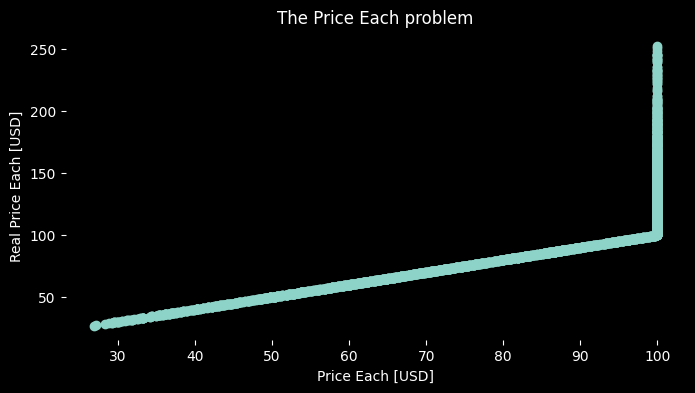

In [99]:
mpl.style.use('dark_background')
fig,ax = plt.subplots(figsize=(8,4))
ax.scatter(df_vendido['PRICEEACH'], df_vendido['REALPRICEEACH'])
ax.set_title('The Price Each problem')
ax.set_xlabel('Price Each [USD]')
ax.set_ylabel('Real Price Each [USD]')
ax.grid(visible=False)
ax.set_frame_on(False)

Analizando la distribución, vemos que la paridad se cumple hasta que el precio unitario que trae el Dataset llega al valor de USD 100. A partír de allí, ningún producto adopta un valor superior.

Asimismo, no podemos suponer que hay un impuesto o costo de flete que se esté adicionando para alcanzar el subtotal de venta que trae la columna _SALES_, ya que no hay columnas que contengan esos datos.

Por consiguiente, podemos asumir que al momento de la obtención de los datos se cometió algún error con la columna *PRICEEACH*. Para darle solución se reemplazará en el Dataset los valores originales de *PRICEEACH* por lo que resulta de la dividir el subtotal de ventas por la cantidad ordenada. 

*PRICEEACH* = *SALES* / *QUANTITYORDERED*. 

Finalmente eliminamos la columna *REALPRICEEACH*.

In [100]:
df_vendido['PRICEEACH'] = df_vendido['REALPRICEEACH']
df_vendido = df_vendido.drop('REALPRICEEACH', axis= 'columns')
df_vendido.nunique()

QUANTITYORDERED      57
PRICEEACH          2121
SALES              2691
ORDERDATE           245
STATUS                4
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
CUSTOMERNAME         92
CITY                 73
STATE                31
COUNTRY              19
DEALSIZE              3
DAY_ID               31
dtype: int64

Reordenamos las columnas para que se vea de una forma más conveniente.

In [101]:
df_vendido = df_vendido.reindex(columns=['ORDERDATE', 'YEAR_ID', 'QTR_ID', 'MONTH_ID','DAY_ID', 'PRODUCTLINE', 'PRODUCTCODE', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'STATUS', 'DEALSIZE', 'CUSTOMERNAME', 'CITY','COUNTRY', 'STATE'])
df_vendido.head()

,ORDERDATE,YEAR_ID,QTR_ID,MONTH_ID,DAY_ID,PRODUCTLINE,PRODUCTCODE,QUANTITYORDERED,PRICEEACH,SALES,MSRP,STATUS,DEALSIZE,CUSTOMERNAME,CITY,COUNTRY,STATE
578,2003-01-06,2003,1,1,6,Vintage Cars,S18_1749,30,171.70,5151.00,170,Shipped,Medium,Online Diecast Creations Co.,Nashua,USA,NH
680,2003-01-06,2003,1,1,6,Vintage Cars,S18_2248,50,67.80,3390.00,60,Shipped,Medium,Online Diecast Creations Co.,Nashua,USA,NH
1267,2003-01-06,2003,1,1,6,Vintage Cars,S18_4409,22,86.51,1903.22,92,Shipped,Small,Online Diecast Creations Co.,Nashua,USA,NH
2024,2003-01-06,2003,1,1,6,Vintage Cars,S24_3969,49,34.47,1689.03,41,Shipped,Small,Online Diecast Creations Co.,Nashua,USA,NH
1539,2003-01-09,2003,1,1,9,Vintage Cars,S24_1937,45,31.20,1404.00,33,Shipped,Small,"Blauer See Auto, Co.",Frankfurt,Germany,Germany


### Histograma de ventas
Luego de haber adecuado los datos para poder trabajar, realizaremos un histograma para ver si estamos en presencia de una distribución normal. Esto nos dará la pauta de cuáles son los estadisticos más representativos usar a la hora de expresar alguna información clave en cuanto a las ventas.

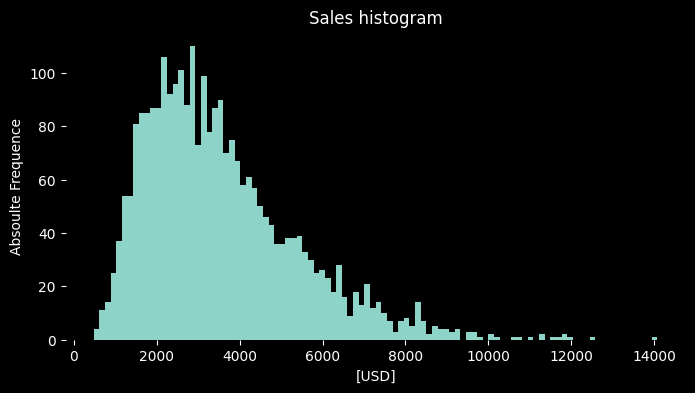

In [102]:
mpl.style.use('dark_background')
fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df_vendido['SALES'].values.flatten(),bins=100)
ax.set_title('Sales histogram')
ax.set_xlabel('[USD]')
ax.set_ylabel('Absoulte Frequence')
ax.grid(visible=False)
ax.set_frame_on(False)

El histograma de ventas muestra una distribución normal con asimetría a izquierda. Con lo cual, si nos interesa saber cual es el valor más probable de una venta aleatoria podemos utilizar el valor de la mediana, ya que el promedio se verá afectado mayormente por esporádicas ventas de mayor importe.

In [103]:
#Asimetría a izquierda, la media es mayor que la mediana
df_vendido.SALES.mean() > df_vendido.SALES.median()


True

### Ventas diarias
Empezaremos a estudiar la existencia de estacionalidad. Para esto, realizamos un gráfico que nos muestre la evolución diaria de las ventas en el transcurso de los datos que nos trae el data set del fabricante. 

In [104]:
venta_diaria = df_vendido.groupby(['YEAR_ID', 'MONTH_ID', 'DAY_ID','ORDERDATE','PRODUCTLINE'])[['SALES', 'QUANTITYORDERED']].sum().reset_index()
max_sale_2003= venta_diaria.loc[venta_diaria['YEAR_ID'].isin([2003])].SALES.max() #Se calcula el valor diario de venta máxima de 2003
max_sale_2004= venta_diaria.loc[venta_diaria['YEAR_ID'].isin([2004])].SALES.max() #Se calcula el valor diario de venta máxima de 2004
max_sale_2005= venta_diaria[venta_diaria['YEAR_ID'].isin([2005])].SALES.max() #Se calcula el valor diario de venta máxima de 2005
venta_diaria.tail()

,YEAR_ID,MONTH_ID,DAY_ID,ORDERDATE,PRODUCTLINE,SALES,QUANTITYORDERED
578,2005,5,29,2005-05-29,Vintage Cars,27807.52,319
579,2005,5,30,2005-05-30,Vintage Cars,14578.75,187
580,2005,5,31,2005-05-31,Classic Cars,34335.00,276
581,2005,5,31,2005-05-31,Trucks and Buses,43026.41,394
582,2005,5,31,2005-05-31,Vintage Cars,1556.62,26


In [105]:
curdoc().theme = 'dark_minimal'
line_plot = figure(width=1200, height=400, title='Daily Sales',
                   x_axis_label='Date', y_axis_label='100K [USD]',x_axis_type='datetime',y_axis_type='mercator')
line_plot.line(venta_diaria.ORDERDATE, venta_diaria.SALES, 
                legend_label = 'Daily sales',line_width=2, color= 'violet')
line_plot.line(venta_diaria.ORDERDATE, max_sale_2005, 
                legend_label = 'Maximum value 2005: USD {}'.format(max_sale_2005.round(1)),line_width=1.5, color= 'red',line_dash= 'dotted')
line_plot.line(venta_diaria.ORDERDATE, max_sale_2004, 
                legend_label = "Maximum value 2004: USD {}".format(max_sale_2004.round(1)),line_width=1.5, color= 'orange', line_dash= 'dotted')
line_plot.line(venta_diaria.ORDERDATE, max_sale_2003, 
                legend_label = "Maximum value 2003: USD {}".format(max_sale_2003.round(1)),line_width=1.5, color= 'yellow', line_dash= 'dotted')
line_plot.line(venta_diaria.ORDERDATE, venta_diaria['SALES'].median(), 
                legend_label = "Median value: USD {}".format(df_vendido['SALES'].median().round(1)),line_width=1.5, color= 'green')
line_plot.line(venta_diaria.ORDERDATE, venta_diaria['SALES'].min(), 
                legend_label = "Minimum value: USD {}".format(df_vendido['SALES'].min().round(1)),line_width=1.5, color= 'blue', line_dash= 'dotted')
line_plot.xaxis.formatter=DatetimeTickFormatter(
#       hours="%d %B %Y",
        days="%d %B %Y",
        months="%d %B %Y",
        years="%d %B %Y")
line_plot.add_tools(HoverTool())
HoverTool().tooltips = [        #tengo que arreglar el Hover porque la forma de presentar los datos no es facil de entender
    ("Fecha", "@ORDERDATE{%F}"),
    ("Ventas", "@SALES{$0,0}")
] 
line_plot.legend.location = "top_left"
output_notebook()
show(line_plot)

Loading BokehJS ...

En este gráfico se representan los subtotales de venta en el tiempo para conocer el historial de la empresa. Se pueden observar picos en la zona entre los meses de octubre y diciembre, como esperábamos. Lo veremos mejor en un gráfico en donde se pueda ver mejor el comporatamiento mes a mes.

### Comparativa de interanual de ventas
Analizamos las ventas mensuales y los promedios interanuales de cada mes.

In [106]:
#Agrupamos la suma de ventas mensuales de cada año
venta_mensual= venta_diaria.groupby(['YEAR_ID', 'MONTH_ID'])[['SALES']].sum().reset_index()
venta_mensual.tail()

,YEAR_ID,MONTH_ID,SALES
24,2005,1,339543.42
25,2005,2,358186.18
26,2005,3,374262.76
27,2005,4,235620.42
28,2005,5,411661.07


In [107]:
#Hago una tabla dinámica con el data set anterior para poder gráficarlo de forma más simple con Seaborn
ventas_mes_anio = venta_mensual.pivot_table(values='SALES', index="MONTH_ID", columns='YEAR_ID')
ventas_mes_anio.set_index(ventas_mes_anio.index-1, inplace=True)
print(ventas_mes_anio)

YEAR_ID         2003        2004       2005
MONTH_ID                                   
0          129753.60   316577.42  339543.42
1          140836.19   311419.53  358186.18
2          174504.90   205733.73  374262.76
3          201609.55   206148.12  235620.42
4          192673.11   228080.73  411661.07
5          168082.56   186255.32        NaN
6          187731.88   327144.09        NaN
7          197809.30   461501.27        NaN
8          263973.36   320750.91        NaN
9          519580.05   552924.25        NaN
10        1029837.66  1089048.01        NaN
11         261876.46   372802.66        NaN


In [108]:
#Para el gráfico de barras, tomaré el promedio de ventas de cada mes en los últimos 2 o 3 años, dependiendo de la disponibilidad de datos.
venta_mensual_media= venta_mensual.groupby(['MONTH_ID'])[['SALES']].mean().reset_index()
venta_mensual_media.set_index('MONTH_ID', inplace=True)
venta_mensual_media.round(2)

,SALES
MONTH_ID,
1,261958.15
2,270147.30
3,251500.46
4,214459.36
5,277471.64
6,177168.94
7,257437.98
8,329655.29
9,292362.14


### Patrón de ventas mensuales
Se grafica la evolucion de ventas mensualmente con líneas. Las barras representan las ventas promedio del mes entre los años involucrados

<Axes: xlabel='MONTH_ID', ylabel='SALES'>

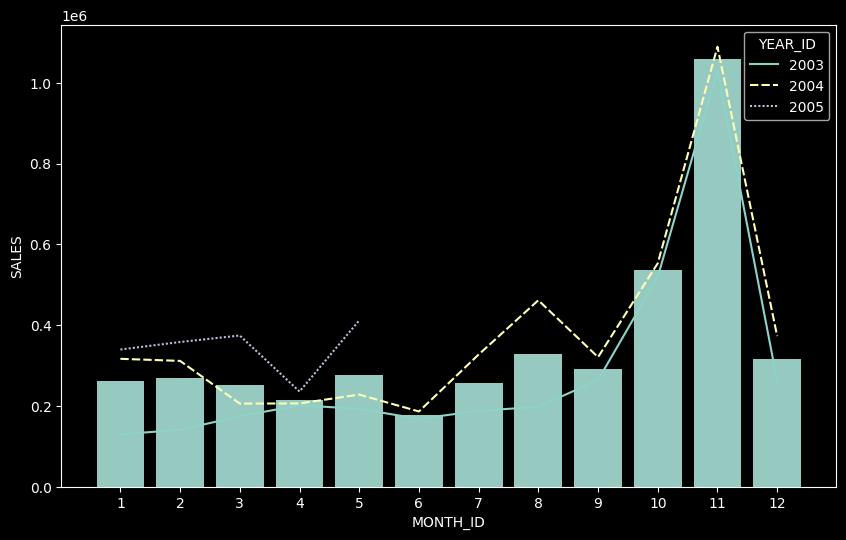

In [109]:

plt.figure(figsize=(10,6))
sns.barplot(y='SALES',x='MONTH_ID', data=venta_mensual_media)
sns.lineplot(data=ventas_mes_anio)

Podemos observar que los clientes se preparan para la Navidad a partir de Octubre. Hay que investigar qué otro fenómeno puede estar sucediendo en mayo y agosto.
En este sentido, es interesante saber adónde van los productos. De esa forma podemos tomar los paises más influyentes y averiguar si hay alguna fecha importante que produzca la demanda. 
De lograr esto último, podríamos confirmar que se trata de un consumo estacional.
Antes de abordar los precios de venta, veamos en dónde están los principales clientes.

In [110]:
print(df_vendido['COUNTRY'].unique())

['USA' 'Germany' 'Norway' 'Spain' 'Denmark' 'Italy' 'Philippines' 'UK'
 'Sweden' 'France' 'Belgium' 'Singapore' 'Austria' 'Australia' 'Finland'
 'Canada' 'Japan' 'Ireland' 'Switzerland']


In [111]:
#agrupo la tabla para obtener solo las columnas que necesito, país, línea de producto y cantidad. Sumo las cantidades.
data= df_vendido.groupby(['COUNTRY', 'PRODUCTLINE'])[['QUANTITYORDERED']].sum().reset_index()
data

,COUNTRY,PRODUCTLINE,QUANTITYORDERED
0,Australia,Classic Cars,1818
1,Australia,Motorcycles,876
2,Australia,Planes,750
3,Australia,Ships,24
4,Australia,Trains,33
...,...,...,...
110,USA,Planes,3476
111,USA,Ships,2130
112,USA,Trains,870
113,USA,Trucks and Buses,3932


Mostraremos en una tabla dinámica las cantidades conusmidas por cada país de los distintas líneas de juguetes

In [112]:
#Hacemos una tabla dinámica para que quede en columna los juguetes y fila los paises.
data = data.pivot_table(values='QUANTITYORDERED', index="PRODUCTLINE", columns='COUNTRY')
data

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
PRODUCTLINE,,,,,,,,,,,,,,,,,,,
Classic Cars,1818.0,937.0,147.0,456.0,1070.0,1284.0,3540.0,1281.0,202.0,948.0,314.0,1158.0,478.0,1043.0,4380.0,508.0,1078.0,1078.0,11605.0
Motorcycles,876.0,197.0,NaN,41.0,NaN,447.0,2404.0,121.0,58.0,77.0,309.0,484.0,241.0,44.0,521.0,133.0,NaN,371.0,5080.0
Planes,750.0,200.0,41.0,317.0,70.0,421.0,1136.0,245.0,115.0,1122.0,547.0,325.0,215.0,NaN,790.0,NaN,NaN,479.0,3476.0
Ships,24.0,113.0,343.0,486.0,436.0,315.0,766.0,55.0,NaN,194.0,208.0,NaN,NaN,174.0,1312.0,80.0,NaN,831.0,2130.0
Trains,33.0,NaN,97.0,NaN,134.0,89.0,222.0,89.0,50.0,82.0,49.0,72.0,NaN,174.0,509.0,32.0,NaN,168.0,870.0
Trucks and Buses,705.0,203.0,NaN,517.0,73.0,384.0,1067.0,81.0,37.0,47.0,102.0,308.0,NaN,888.0,1709.0,433.0,NaN,291.0,3932.0
Vintage Cars,1876.0,324.0,446.0,476.0,240.0,252.0,1955.0,276.0,28.0,1303.0,313.0,495.0,27.0,437.0,2344.0,270.0,NaN,1366.0,8112.0


Reemplazamos los valores NaN para que no ueden agujeros en el mapa de calor

In [113]:
#reemplazo los valores NaN por 0
valores = data.values
indice = pd.Series(data.index)
columnas = pd.Series(data.columns)
print(indice, columnas)

# defino el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
# transformo los valores del dataset
transformados = imputador.fit_transform(valores)
transformados=pd.DataFrame(transformados)
transformados= transformados.rename(columns=columnas)
transformados= transformados.rename(index= indice)
data=transformados

0        Classic Cars
1         Motorcycles
2              Planes
3               Ships
4              Trains
5    Trucks and Buses
6        Vintage Cars
Name: PRODUCTLINE, dtype: object 0       Australia
1         Austria
2         Belgium
3          Canada
4         Denmark
5         Finland
6          France
7         Germany
8         Ireland
9           Italy
10          Japan
11         Norway
12    Philippines
13      Singapore
14          Spain
15         Sweden
16    Switzerland
17             UK
18            USA
Name: COUNTRY, dtype: object


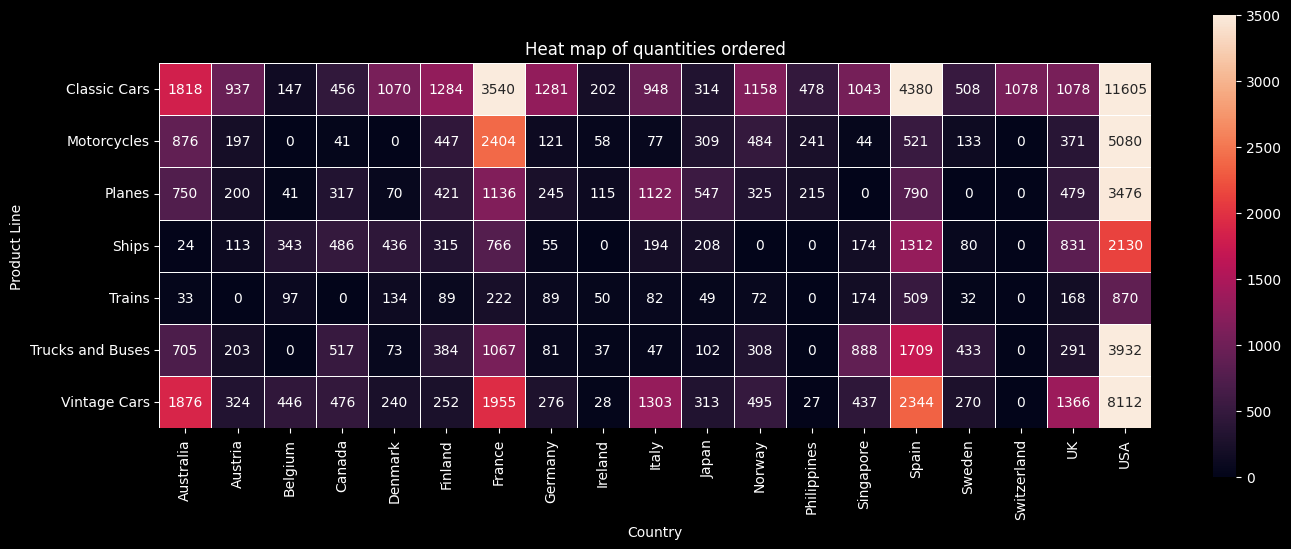

In [114]:
#El mapa de calor se debe hacer sin USA porque el mercado es mucho más grande que el resto
plt.figure(figsize=(16,6))
ax= sns.heatmap(data, linewidths=0.5, linecolor='white', vmin= data.min().min(),vmax=3500 , annot=True, fmt= '.5g', square= True)
ax.set(xlabel="Country", ylabel="Product Line")
ax.set_title('Heat map of quantities ordered')
plt.show()

Podemos observar que los paises que más consumen son predominantemente USA y luego se disputan entre Australia, Francia y España. 
Otra iformacción destacada es que los autos son los productos de mayor interés: Classic Cars, Vintage Cars y Motorecycles.

Las celebraciones del día del niño en estos paises se dan de la siguiente manera:

Australia: 4to miércoles de octubre

Francia: 1 de junio

España: 15 de abril

Estados Unidos: 2do domingo de julio

(1)

En el gráfico de **Patrón de Ventas Mensuales** podemos notar un incremento de ventas en el mes anterior al día del niño, salvo Australia en que el festejo es más cercano a fin de mes y seguramente las ventas se estén reflejando en el mismo mes de ocurrencia.

1.Datos obtenidos de https://es.wikipedia.org/wiki/D%C3%ADa_Mundial_del_Ni%C3%B1o

In [115]:
df_vendido.nunique()

ORDERDATE           245
YEAR_ID               3
QTR_ID                4
MONTH_ID             12
DAY_ID               31
PRODUCTLINE           7
PRODUCTCODE         109
QUANTITYORDERED      57
PRICEEACH          2121
SALES              2691
MSRP                 80
STATUS                4
DEALSIZE              3
CUSTOMERNAME         92
CITY                 73
COUNTRY              19
STATE                31
dtype: int64

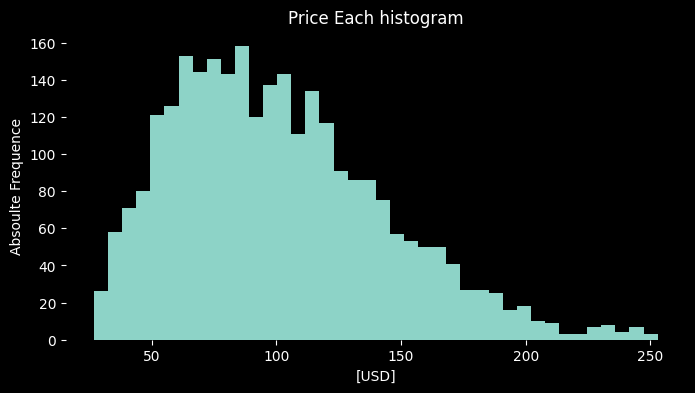

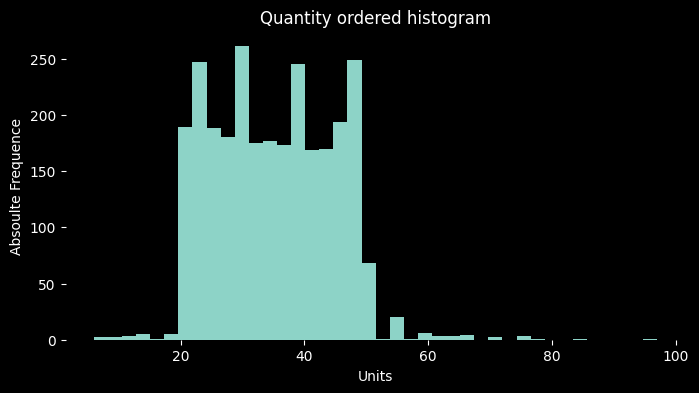

In [116]:
mpl.style.use('dark_background')
fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df_vendido['PRICEEACH'].values.flatten(),bins=40)
ax.set_title('Price Each histogram')
ax.set_xlabel('[USD]')
ax.set_ylabel('Absoulte Frequence')
ax.grid(visible=False)
ax.set_frame_on(False)

fig,ax = plt.subplots(figsize=(8,4))
ax.hist(df_vendido['QUANTITYORDERED'].values.flatten(),bins=40)
ax.set_title('Quantity ordered histogram')
ax.set_xlabel('Units')
ax.set_ylabel('Absoulte Frequence')
ax.grid(visible=False)
ax.set_frame_on(False)

Text(0.5, 0.98, 'Linear regression with marginal distributions')

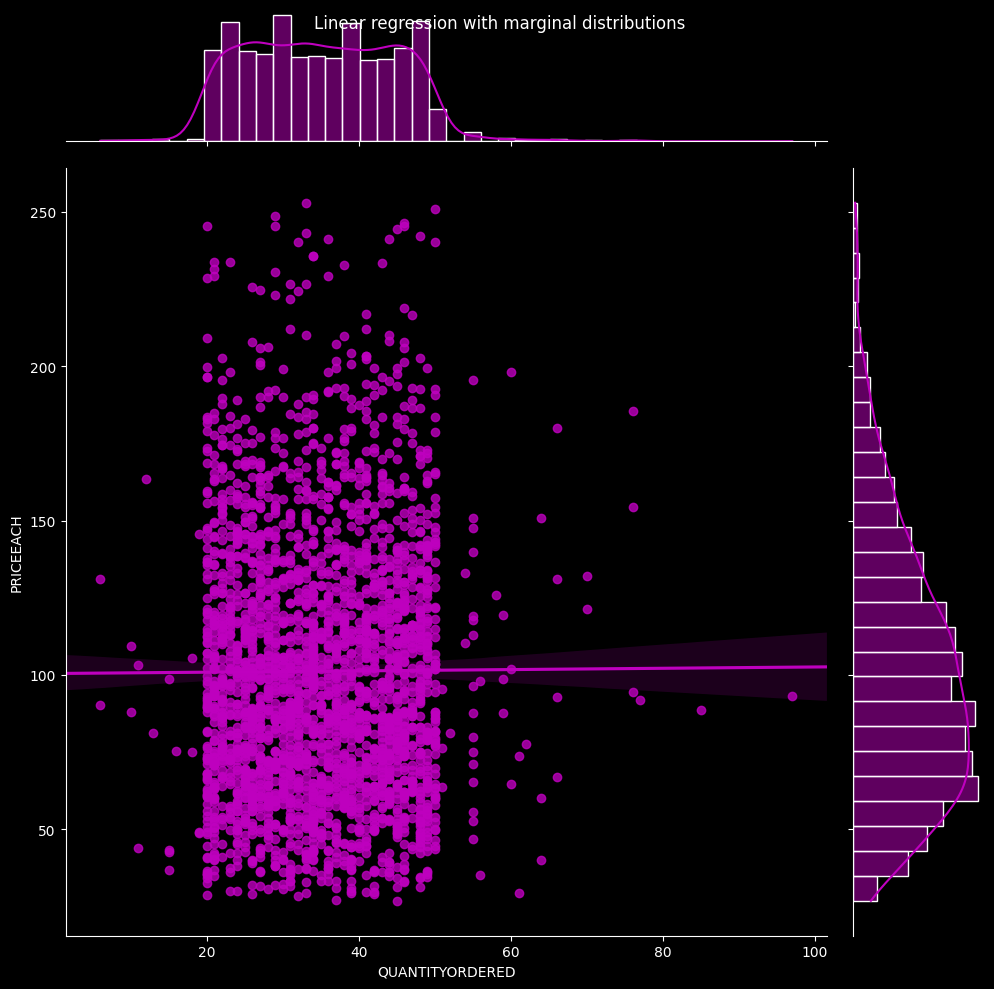

In [117]:
#cantidades = sns.load_dataset("tips")
g = sns.jointplot(x="QUANTITYORDERED", y="PRICEEACH", data=df_vendido,
                  kind="reg", truncate=False,
                  color="m", height=10, 
                  )
g.figure.suptitle('Linear regression with marginal distributions')


Se realizaron esta serie de gráficos precedentes para ver la distribución de precios unitarios y cantidades, lo cual inidca que las cantidades tienen distribución homogénea mientras que los precios unitarios tiene distribución normal con asimetría a izquierda. La recta adopta el valor del precio unitario promedio. No se observa un comportamiento inesperado. 

In [118]:
df_vendido['PRICEEACH'].mean()

101.21605994152162

### Comportamiento del precio unitario de venta de acuerdo a la estacionalidad
Veamos cómo varían los precios de lista de acuerdo al mes del año en cuestión.

In [119]:
#Agrupamos la mediana del precio de venta de mensual por línea de producto
precio_promedio_mensual= df_vendido.groupby(['YEAR_ID', 'MONTH_ID','PRODUCTLINE'])[['PRICEEACH']].median().reset_index()
precio_promedio_mensual.tail()

,YEAR_ID,MONTH_ID,PRODUCTLINE,PRICEEACH
175,2005,5,Planes,89.985
176,2005,5,Ships,83.130
177,2005,5,Trains,63.850
178,2005,5,Trucks and Buses,110.965
179,2005,5,Vintage Cars,76.310


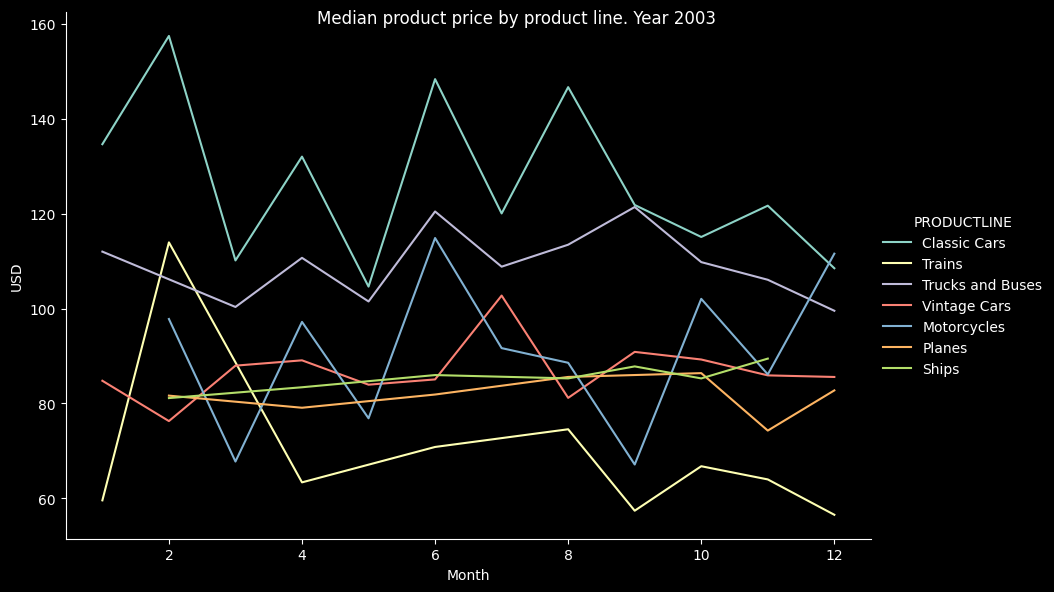

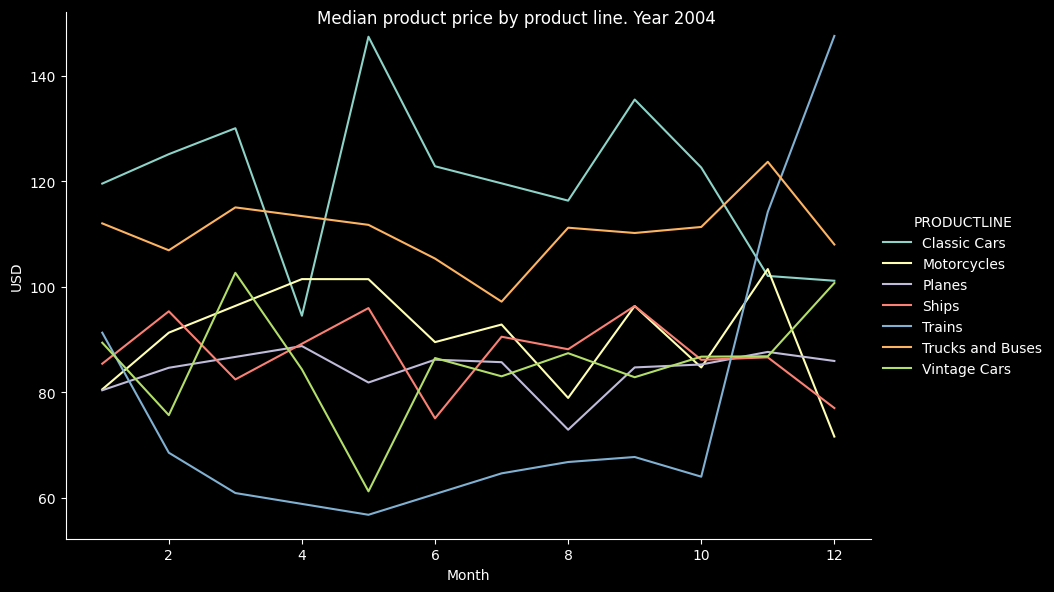

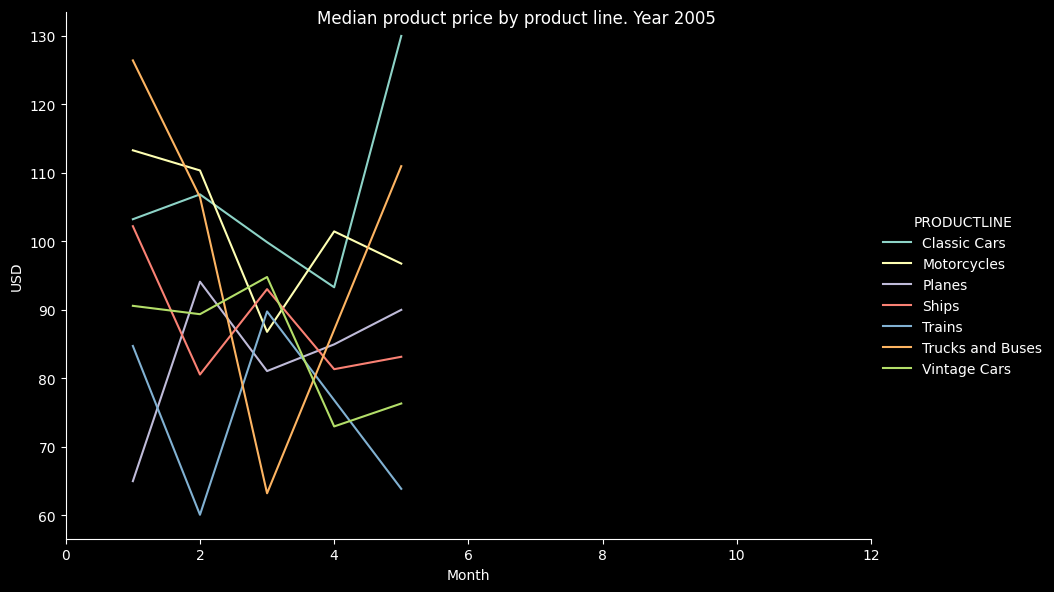

In [120]:

ax=sns.relplot(
                data=precio_promedio_mensual.query("YEAR_ID == 2003"),
                kind="line",
                x="MONTH_ID", y="PRICEEACH", hue="PRODUCTLINE",
                estimator=None,
                height=6, aspect=1.5
)
ax.figure.suptitle('Median product price by product line. Year 2003')
ax.set(xlabel="Month", ylabel="USD")
plt.show()
ax=sns.relplot(
                data=precio_promedio_mensual.query("YEAR_ID == 2004"),
                kind="line",
                x="MONTH_ID", y="PRICEEACH", hue="PRODUCTLINE",
                estimator=None,
                height=6, aspect=1.5
)
ax.figure.suptitle('Median product price by product line. Year 2004')
ax.set(xlabel="Month", ylabel="USD")
plt.show()
ax=sns.relplot(
                data=precio_promedio_mensual.query("YEAR_ID == 2005"),
                kind="line",
                x="MONTH_ID", y="PRICEEACH", hue="PRODUCTLINE",
                estimator=None,
                height=6, aspect=1.5
)
ax.figure.suptitle('Median product price by product line. Year 2005')
ax.set(xlabel="Month", ylabel="USD",xlim={0,12})
plt.show()

In [121]:
precio_promedio=df_vendido.groupby(['YEAR_ID', 'MONTH_ID'])[['PRICEEACH']].median().reset_index()
precio_promedio.tail()

,YEAR_ID,MONTH_ID,PRICEEACH
24,2005,1,96.920
25,2005,2,102.300
26,2005,3,87.035
27,2005,4,87.600
28,2005,5,98.840


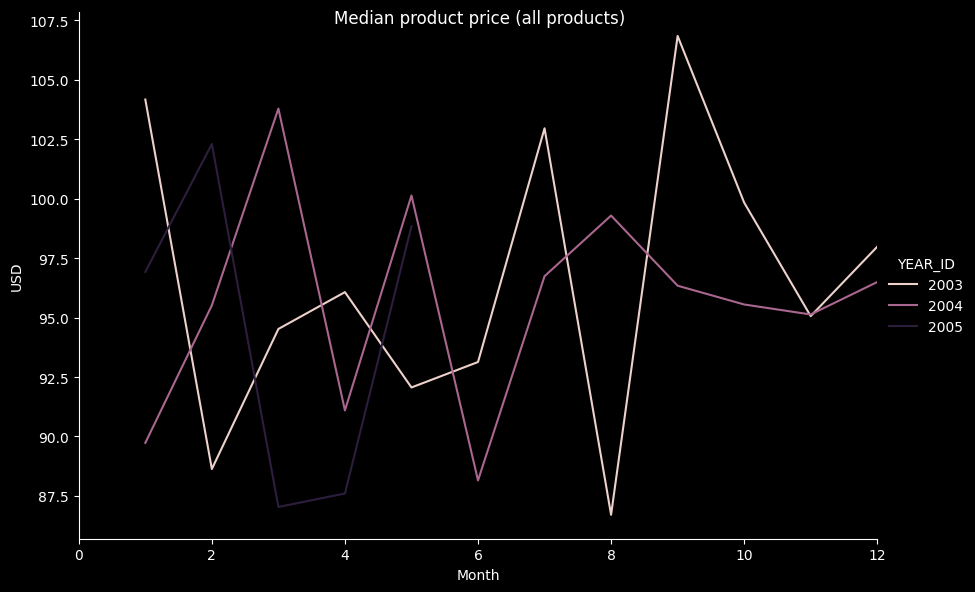

In [122]:
#ax= sns.lineplot(x='MONTH_ID', y= 'PRICEEACH', data=precio_promedio_mensual)

ax=sns.relplot(
                data=precio_promedio,
                kind="line",
                x="MONTH_ID", y="PRICEEACH",
                hue="YEAR_ID",
                estimator=None,
                height=6, aspect=1.5
)
ax.figure.suptitle('Median product price (all products)')
ax.set(xlabel="Month", ylabel="USD",xlim={0,12})
plt.show()

Esperábamos encontrarnos encontrarnos con una evolución de los precios relacionada con el consumo, sin embargo, no pareciera encontrarse un patrón que nos permita sacar alguna conclusión desde lo visual. En principio, podemos agregar a la hipótesis que las líneas de producto pueden responder a los ciclos de producción y de venta. Es decir que salgan al mercado con un precio que se puede incrementar hasta que se necesite bajar el stock para contar con las finanzas necesarias para seguir operando. Esperamos poder recurrir a alguna herramienta de Machine Learning para tener un poco más de luz sobre el tema.

### Precio unitario vs MSRP

Realizaremos un gráfico de dispersión para entender si hay una relación entre el precio de venta y el MSRP

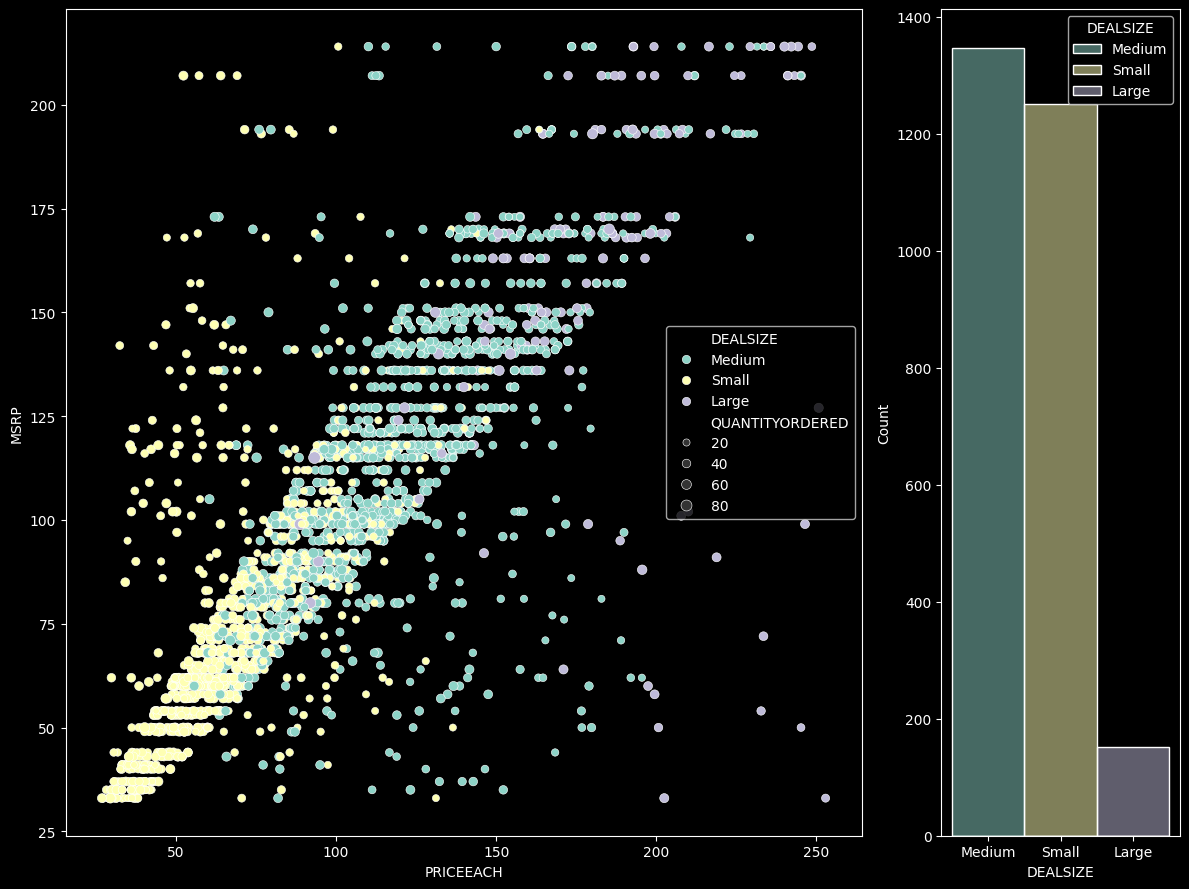

In [123]:
fig,axs = plt.subplots(1, 2, figsize=(12, 9), gridspec_kw=dict(width_ratios=[5, 1.5]))
sns.set_style({'axes.grid': False})
sns.scatterplot(data = df_vendido, 
                x = df_vendido['PRICEEACH'], 
                y = df_vendido['MSRP'],
                hue= df_vendido['DEALSIZE'],
                size= df_vendido['QUANTITYORDERED'], ax=axs[0])
sns.histplot(data = df_vendido, x = df_vendido['DEALSIZE'], hue= df_vendido['DEALSIZE'],ax=axs[1])
fig.tight_layout()

En este gráfico podemos observar hay una relación directa entre el precio de venta y el precio sugerido de venta al por menor. Además hay negocios que genera una dispersión con una particularidad:
Los casos anómalos de negocios pequeños tienden a diferenciarse por tener un precio sugerido mayor al de venta, mientras que los negocios medianos el precio sugerido está por debajo del precio de venta. 
En general, se puede inferir que la sugerencia de precio se hace con un criterio que es tenido en cuenta con rigurosidad.